# **Google Capstone Project: How Can a Wellness Technology Company Play It Smart? **

By - *Rishabh Sharma*

Updated - *January 18, 2022*



# **Scenario**

I imagined myself as a junior data analyst working on the marketing analyst team at [Bellabeat](https://bellabeat.com/). I have been asked to focus on one of Bellabeat's products and analyze the data from the smart device to gain insight about the usage of this technology by consumers. I will present my analysis to the executive team along with high-level recommendations for their marketing strategy to gain a competetive edge in the global smart device market.  

In order to answer the key business questions I have followed the steps of data analytics process:
* Ask
* Prepare
* Process
* Analyze
* Share
* Act

# **About the company**

Bellabeat is a high-tech company that manufactures health focused smart products to inform and inspire women around the world. It makes several products that empower women with knowledge about their own health and habits like sleep activity, steps count, hydration level, and mauch more. It was founded in 2013 by Urška Sršen and Sando Mur. 

Various products offered by Bellabeat:
* Bellabeat app - Provides health data related to the various activities of user.
* Leaf - Bellabat's wellness tracker available as bracelet, necklace, or clip.
* Time - Hybrid fitness band act as classic time piece too. 
* Spring - Smart water bottle that tracks water consumed and hydration levels. 




# **1. Ask**

**Business Objective**
* What are some trends in smart device usage. 
* How can these trends apply to Bellabeat's customers.
* How could these trends help influence Bellabeat's marketing strategy. 

**Key Stakeholders**
* *Urška Sršen*: Bellabeat’s cofounder and Chief Creative Officer.
* *Sando Mur*: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team.

# **2. Prepare** 

**Data Source**
* The data is made available through [Mobius](https://www.kaggle.com/arashnic) on Kaggle named [FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit). 
* This dataset was collected by a survey via Amazon Mechanical Turk in the time period of 12 March, 2016 to 12 May, 2016.

**Data Licensing, Privacy and Security**

* This data is available under the license CC0: Public Domain. More information about the metadata can be found [here](https://www.kaggle.com/arashnic/fitbit/metadata).
* Data anonymized to protect personal information like e-mail adress and name of the users.
* Lacks security as publicly available. 


**Data Type**
* The dataset is available in 18 .csv type format. 
* Data collected was from 30 users who consented to the use of minute-level output from their fitness tracker like heart rate, sleep monitoring, steps count, and more. 

**Does Data ROCC?**

It is made up acronym which tests the various aspects of data.
* R (Reliable) -> Less reliable as sample size is low (30).
* O (Original) -> Fair as submitted by users but preprocessed. 
* C (Comprehensive) -> Descent parameters included in dataset. 
* C (Current) -> Not so current as collected 6 years ago (2016).
* C (Cited) -> Fair but collected by third party.



**Installing and loading common/required packages and librariess**
* tidyverse - For general data analytics tasks.
* lubridater - For date and time formats.
* ggplot2 - For generating visualizations.
* dplyr - For data wrangling
* skimr - For summarizing data
* janitor - For cleaning the data

In [63]:
# Instal required packages
install.packages("tidyverse")
install.packages("lubridate")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("skimr")
install.packages("janitor")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [64]:
# Load installed packages
library("tidyverse")
library("lubridate")
library("ggplot2")
library("dplyr")
library("skimr")
library("janitor")

**Importing the tables into R**

I have chosen following files that contain every data in other files or data in other files is same but in different unit:

* dailyActivity_merged.csv
* heartrate_seconds_merged.csv
* sleepDay_merged.csv
* weightLogInfo_merged.csv

For example, dataset 'dailyActivity_merged.csv' includes data of 'dailycalories_merged.csv' file and 'hourlyCalories_merged.csv' file.

Let's add these .csv files into R by creating dataframes with simple naming conventions. 

In [65]:
# Use read.csv() function to import the tables
daily_activity = read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
heart_rate = read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
sleep_data = read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log = read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


After importing these tables, we can view the type of data contained in those tables to get familarized with type of data and how it is organized. 

In [66]:
# Use head() function to display top 6 rows from each dataframe imported. 
head(daily_activity)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [67]:
head(heart_rate)

,Id,Time,Value
,<dbl>,<chr>,<int>
1,2022484408,4/12/2016 7:21:00 AM,97
2,2022484408,4/12/2016 7:21:05 AM,102
3,2022484408,4/12/2016 7:21:10 AM,105
4,2022484408,4/12/2016 7:21:20 AM,103
5,2022484408,4/12/2016 7:21:25 AM,101
6,2022484408,4/12/2016 7:22:05 AM,95


In [68]:
head(sleep_data)


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


In [69]:
head(weight_log)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


*Note - 'ID' field is common in all the datasets and can be used to merge the dataframes.*

# **3. Process**

The Process stage involves ensuring data integrity by cleaning the data. Verifying that the data is consistent, accurate, and complete. Cleaning the data involves many steps, some of them can be checking for blank cells in the dataframes, changing the data type of a column (transforming the data), sorting and filtering the data. 

**Key Tasks**

* Explore data more deeply to look for errors and rectify them.  
* Check data for missing values or NULL values. 
* Clean the data to make further analyzing easier.
* Sort and filter the data.
* Document cleaning process.

In [70]:
# Take a deeper look into each dataset using the glimpse() function 
glimpse(daily_activity)


Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

In [71]:
glimpse(heart_rate)

Rows: 2,483,658
Columns: 3
$ Id    <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 2022484408, 2022…
$ Time  <chr> "4/12/2016 7:21:00 AM", "4/12/2016 7:21:05 AM", "4/12/2016 7:21:…
$ Value <int> 97, 102, 105, 103, 101, 95, 91, 93, 94, 93, 92, 89, 83, 61, 60, …


In [72]:
glimpse(sleep_data)

Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


In [73]:
glimpse(weight_log)

Rows: 67
Columns: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <chr> "5/2/2016 11:59:59 PM", "5/3/2016 11:59:59 PM", "4/13/2…
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, …
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 159.6…
$ Fat            <int> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, NA,…
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25,…
$ IsManualReport <chr> "True", "True", "False", "True", "True", "True", "True"…
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+12,…


**Key takeaways**

* Column named 'ActivityDate' in the dataset `daily_activity` has the character datatype.
* Column named 'Time' in the dataset `heart_rate` has the character datatype.
* Column named 'SleepDay' in the dataset `sleep_data` has the character datatype.
* Column named 'Date' in the dataset `weight_log` has the character datatype.



**Transforming the Data**

We can convert the character type of these fields into date type, to make analysis simple. We can repeat the same step for all the datasets. 

In [74]:
# Use the as.POSIXct() function to convert character into POSIXct data type
daily_activity$ActivityDate = as.POSIXct(daily_activity$ActivityDate,tz=Sys.timezone(), format = "%m/%d/%Y")
# Lets view the made action on the dataset
head(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [75]:
# For heart_rate dataset
heart_rate$Time = as.POSIXct(heart_rate$Time,tz=Sys.timezone(), format = "%m/%d/%Y")
head(heart_rate)

,Id,Time,Value
,<dbl>,<dttm>,<int>
1,2022484408,2016-04-12,97
2,2022484408,2016-04-12,102
3,2022484408,2016-04-12,105
4,2022484408,2016-04-12,103
5,2022484408,2016-04-12,101
6,2022484408,2016-04-12,95


In [76]:
# For sleep_data dataset
sleep_data$SleepDay = as.POSIXct(sleep_data$SleepDay,tz=Sys.timezone(), format = "%m/%d/%Y")
head(sleep_data)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<dttm>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346
2,1503960366,2016-04-13,2,384,407
3,1503960366,2016-04-15,1,412,442
4,1503960366,2016-04-16,2,340,367
5,1503960366,2016-04-17,1,700,712
6,1503960366,2016-04-19,1,304,320


In [77]:
# For weight_log dataset
weight_log$Date = as.POSIXct(weight_log$Date,tz=Sys.timezone(), format = "%m/%d/%Y")
head(weight_log)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<dttm>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,2016-05-02,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,2016-05-03,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,2016-04-13,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,2016-04-21,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,2016-05-12,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,2016-04-17,72.4,159.6147,25,27.45,True,1.460938e+12


**Verifying Data is complet, accurate, and consistent**

* Lets check for any NULL values or blank cells in the datasets.

In [78]:
# Use skim_without_charts() function to spot any blank cells 
skim_without_charts(daily_activity)

── Data Summary ────────────────────────
                           Values        
Name                       daily_activity
Number of rows             940           
Number of columns          15            
_______________________                  
Column type frequency:                   
  numeric                  14            
  POSIXct                  1             
________________________                 
Group variables            None          

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable            n_missing complete_rate    mean      sd         p0
 1 Id                               0             1 4.86e+9 2.42e+9 1503960366
 2 TotalSteps                       0             1 7.64e+3 5.09e+3          0
 3 TotalDistance                    0             1 5.49e+0 3.92e+0          0
 4 TrackerDistance                  0             1 5.48e+0 3.91e+0          0
 5 LoggedActivitiesDistance         0             1 1.08e-1 6.

In [79]:
# For heart_rate dataset
skim_without_charts(heart_rate)

── Data Summary ────────────────────────
                           Values    
Name                       heart_rate
Number of rows             2483658   
Number of columns          3         
_______________________              
Column type frequency:               
  numeric                  2         
  POSIXct                  1         
________________________             
Group variables            None      

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate         mean           sd         p0
1 Id                    0             1 5513764629.  1950223761.  2022484408
2 Value                 0             1         77.3         19.4         36
         p25        p50        p75       p100
1 4388161847 5553957443 6962181067 8877689391
2         63         73         88        203

── Variable type: POSIXct ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min   

In [80]:
# For sleep_data dataset
skim_without_charts(sleep_data)

── Data Summary ────────────────────────
                           Values    
Name                       sleep_data
Number of rows             413       
Number of columns          5         
_______________________              
Column type frequency:               
  numeric                  4         
  POSIXct                  1         
________________________             
Group variables            None      

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate          mean      sd         p0
1 Id                         0             1 5000979403.   2.06e+9 1503960366
2 TotalSleepRecords          0             1          1.12 3.46e-1          1
3 TotalMinutesAsleep         0             1        419.   1.18e+2         58
4 TotalTimeInBed             0             1        459.   1.27e+2         61
         p25        p50        p75       p100
1 3977333714 4702921684 6962181067 8792009665
2          1   

In [81]:
# For weight_log dataset 
skim_without_charts(weight_log)

── Data Summary ────────────────────────
                           Values    
Name                       weight_log
Number of rows             67        
Number of columns          8         
_______________________              
Column type frequency:               
  character                1         
  numeric                  6         
  POSIXct                  1         
________________________             
Group variables            None      

── Variable type: character ────────────────────────────────────────────────────
  skim_variable  n_missing complete_rate   min   max empty n_unique whitespace
1 IsManualReport         0             1     4     5     0        2          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate    mean            sd      p0     p25
1 Id                    0        1      7.01e 9 1950321944.   1.50e 9 6.96e 9
2 WeightKg              0        1      7.20e 1         13.9  5

**Key Takeaways**

* Dataset `weight_log` has 65 rows which have NA stored in the column named 'Fat'. 

**Checking for Distinct Users**

Lets check the datasets to explore how many users actually took part in the survey and submitted their data through the tracker.

In [82]:
# Use n_distinct() function to check for unique observations in each datasets
n_distinct(daily_activity$Id)

[1] 33

In [83]:
# For hear_rate dataset
n_distinct(heart_rate$Id)

[1] 14

In [84]:
# For sleep_data dataset
n_distinct(sleep_data$Id)

[1] 24

In [85]:
# For weight_log dataset
n_distinct(weight_log$Id)

[1] 8

**Checking for Duplicates and removing them**

Duplicate values may skew the results and the resulting accuracy of the hypothesis made. I have not used `heart_rate` and `weight_log` datasets as the number of unique users is low (less than half of 33).

In [86]:
# Use the duplicated() function
count(daily_activity[duplicated(daily_activity),])

n
<int>
0


In [87]:
# For sleep_data 
count(sleep_data[duplicated(sleep_data),])

# Use unique() function to update the dataset
sleep_data <- unique(sleep_data)

n
<int>
3


In [88]:
# Check the updated dataset
count(sleep_data[duplicated(sleep_data),])

n
<int>
0


**Key Takeaways**
* Unique users in daily_activity dataset shows 33 users but the metadata of original data shows 30 participants consented for the survey. This shows that the data is *not complete.*
* Dataset is *not consistent* as number of unique users varies across different datasets. This may be due to the reason that some users did not shared their data completely. For example, number of users in `sleep_data` dataset reveals that some users may have not used the tracker during sleep or battery was insufficient and stopped the data retrieval process in between.
* Sample size used for this data 30 (33 found) is not sufficeint to conduct or prove a hypothesis accurately. This makes the data inaccurate*

# **4. Analyze**
Now the data is cleaned, transformed, and organized, we can use it for analysis for:
* Perform calculations on organized data.
* Calculate statistics about data like mean, standard deviation, and percentiles.
* Identify any trends or relationships between the variables.
* Identify how to use these trends to solve business problem.

**Lets view the summary statistics of `daily_activity` and `sleep_data` datatsets**

In [89]:
# Use pipe operator (%>%) to combine more than one function on a dataset
daily_activity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes,
        Calories) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

Lets add some new fields in the daily_activity dataset.

In [90]:
# Use mutate() function to add a new column named 'TotalMinutes' for total minutes tracker used in a day.
daily_activity <- mutate(daily_activity, TotalMinutes = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes + SedentaryMinutes)

# Create 'TotalActive' for total minutes active combining all type of activities.
daily_activity <- mutate(daily_activity, TotalActive = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)

# Create 'TotalActivePercentage' for percentage of time active during the tracker is used.
daily_activity <- mutate(daily_activity, TotalActivePercentage = (TotalActive * 100)/TotalMinutes)
  
# Lets take a look at the newly added fields
head(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalActive,TotalActivePercentage
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1094,366,33.45521
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,1033,257,24.87899
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,1440,222,15.41667
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,998,272,27.25451
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,1040,267,25.67308
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,761,222,29.17214


In [91]:
# View the statistics of the `daily_activity` dataset again
daily_activity %>%  
  select(TotalMinutes,
         TotalActive,
         TotalActivePercentage) %>%
  summary()

  TotalMinutes     TotalActive    TotalActivePercentage
 Min.   :   2.0   Min.   :  0.0   Min.   :  0.00       
 1st Qu.: 989.8   1st Qu.:146.8   1st Qu.: 12.40       
 Median :1440.0   Median :247.0   Median : 21.41       
 Mean   :1218.8   Mean   :227.5   Mean   : 20.02       
 3rd Qu.:1440.0   3rd Qu.:317.2   3rd Qu.: 26.95       
 Max.   :1440.0   Max.   :552.0   Max.   :100.00       

In [92]:
# For sleep_data
sleep_data %>%    
  select(TotalMinutesAsleep,
         TotalTimeInBed) %>%
  summary()

 TotalMinutesAsleep TotalTimeInBed 
 Min.   : 58.0      Min.   : 61.0  
 1st Qu.:361.0      1st Qu.:403.8  
 Median :432.5      Median :463.0  
 Mean   :419.2      Mean   :458.5  
 3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :796.0      Max.   :961.0  

In [93]:
# Use filter() function to find out how many users sleep less than minimum threshold of 6 hours (360 minutes/day) for at least 10 days.
a <- sleep_data
a <- filter(a, (sleep_data$TotalMinutesAsleep < 360 & n_distinct(a$SleepDay) > 10))
n_distinct(a$Id)

# Show the frequency of each user using group_by() and tally() function.
a <- a %>% group_by(Id)
a %>% tally()


[1] 22

Id,n
<dbl>,<int>
1503960366,14
1644430081,3
1927972279,2
2026352035,1
2320127002,1
3977333714,24
4020332650,3
4319703577,3
4388161847,6


**Key Takeaways**

* Average steps taken by a user is 7638/day with average calories burnt in a day equalling to 2304. The steps taken in a day are less compared to the 10,000 steps/day suggested by the CDC (Center for Disease Control) for an adult to stay healthy.
 
 *Note - Unit of calories burned was not specified and specifications of user like age and medical conditions to quantify whether calories burned were sufficient ?*

* Mean time the tracker was used in a day was 1218 minutes out of 1440 minutes in a day (about 84.6%) which shows the tracker was switched off during the rest 15.2%. This may be due to the battery was not sufficient or tracker was not recharged by the user. This suggests that battery life of tracker could be improved or a feature could be added to notify people to recharge their trackers. 

 *Note - Due to the low number of participants the low battery life hypothesis cannot be validated.*

* There are 22 users who sleep less than 6 hours/day for at least 10 days, which is very low and bad for their health.  

# **5. Share**

After analyzing the data, we can create visualizations to visually see the relationship between different variables.


**1. Lets examine the relationship between 'TotalMinutesAsleep' and 'TotalTimeInBed**

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



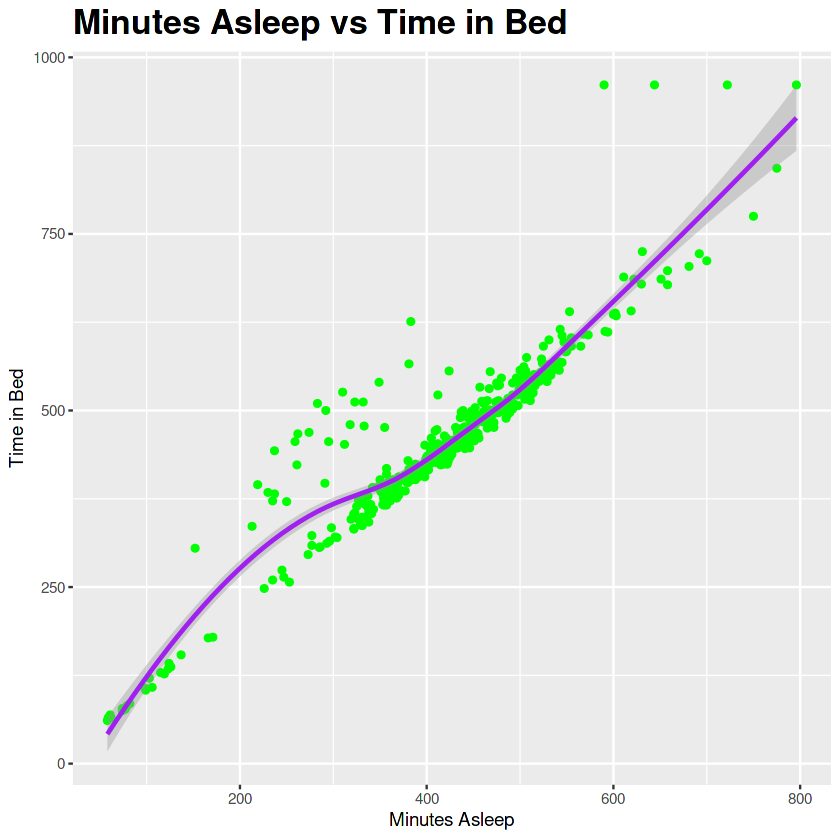

In [122]:
# Use ggplot() to select the dataset 
# Use geom_point() function to plot a scatter plot which may identify the relationship between these two variables.
# Use labs() function to label the plot

ggplot(data = sleep_data) + 
geom_point(mapping = aes(x = TotalMinutesAsleep, y = TotalTimeInBed,), color = "Green") + 
geom_smooth(mapping = aes(x = TotalMinutesAsleep, y = TotalTimeInBed,), color = "Purple") + 
labs(title = "Minutes Asleep vs Time in Bed", x = "Minutes Asleep", y = "Time in Bed") +
theme(plot.title = element_text(size = 20, face = "bold"))


Above graph suggest some people have trouble in sleeping or may wake frequently during night. 

I have a hypothesis that people who are more active during the day have greater ratio of 'TotalMinutesAsleep' to 'TotalTimeInBed'. The lower the value of this ratio, the less user sleep when in bed which indicates they have trouble in sleeping or wakes up frequently that disturbs their deep sleep cycle. Lets first join the `daily_activity` and `sleep_data` datasets to test this hypothesis. 

In [110]:
# Lets do an outer join so that observations which are not common also gets included in one combined dataset
merged_data <- merge(daily_activity, sleep_data, by="Id", all = TRUE)

# Lets take a look at the combined data
head(merged_data)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalActive,TotalActivePercentage,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dttm>,<int>,<int>,<int>
1,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,⋯,175,833,1821,1091,258,23.64803,2016-04-12,1,327,346
2,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,⋯,175,833,1821,1091,258,23.64803,2016-04-13,2,384,407
3,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,⋯,175,833,1821,1091,258,23.64803,2016-04-15,1,412,442
4,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,⋯,175,833,1821,1091,258,23.64803,2016-04-16,2,340,367
5,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,⋯,175,833,1821,1091,258,23.64803,2016-04-17,1,700,712
6,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,⋯,175,833,1821,1091,258,23.64803,2016-04-19,1,304,320


In [113]:
# Lets create a new field in this `merged_data` which will be the ratio of 'TotalMinutesAsleep' to 'TotalTimeInBed'
merged_data <- mutate(merged_data, SleepRatio = TotalMinutesAsleep/TotalTimeInBed)

# Lets take a look at the new field
head(merged_data)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,SedentaryMinutes,Calories,TotalMinutes,TotalActive,TotalActivePercentage,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepRatio
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dttm>,<int>,<int>,<int>,<dbl>
1,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,⋯,833,1821,1091,258,23.64803,2016-04-12,1,327,346,0.9450867
2,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,⋯,833,1821,1091,258,23.64803,2016-04-13,2,384,407,0.9434889
3,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,⋯,833,1821,1091,258,23.64803,2016-04-15,1,412,442,0.9321267
4,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,⋯,833,1821,1091,258,23.64803,2016-04-16,2,340,367,0.9264305
5,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,⋯,833,1821,1091,258,23.64803,2016-04-17,1,700,712,0.9831461
6,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,⋯,833,1821,1091,258,23.64803,2016-04-19,1,304,320,0.9500000


Now, lets plot a scatter plot between the fields 'TotalActivePercentage' and 'SleepRatio' to test our hypothesis.

Warning message:
“Removed 227 rows containing missing values (geom_point).”


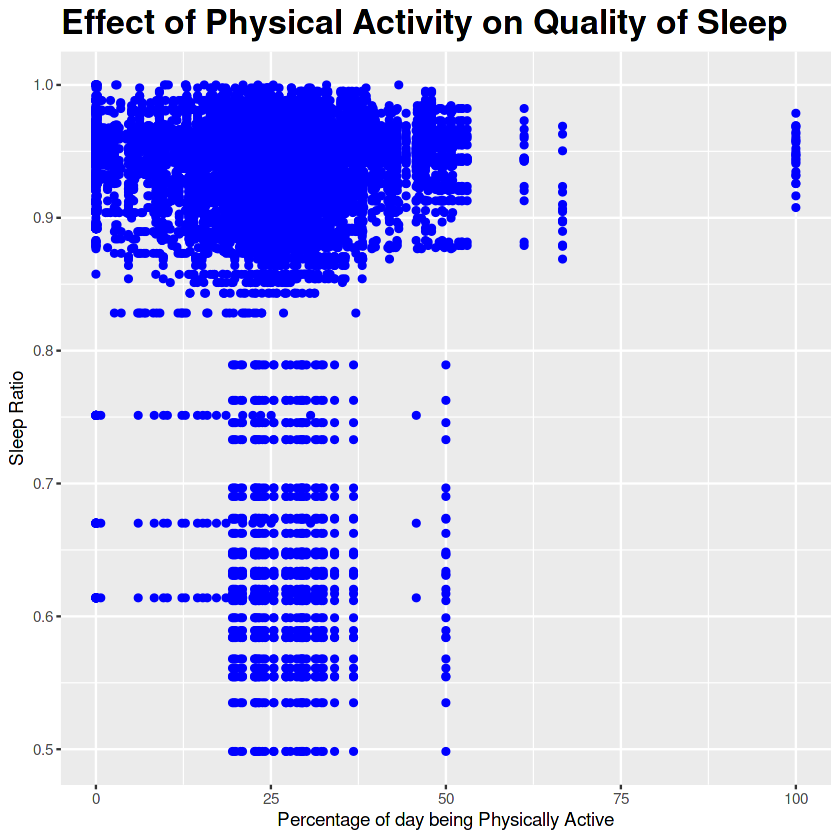

In [129]:
# Use geom_jitter() to remove any outliers
ggplot(data = merged_data) + 
geom_jitter(mapping = aes(x = TotalActivePercentage, y = SleepRatio,), color = "Blue") + 
labs(title = "Effect of Physical Activity on Quality of Sleep", x = "Percentage of day being Physically Active", y = "Sleep Ratio") +
theme(plot.title = element_text(size = 20, face = "bold"))

The Result of this hypthesis was neutral. The majority of data points does not follow this theory but there are some observations which show great Sleep Ratio when the Activity Percentage is above 50%. 

*As the sample size was quite low, the hypothesis cannot be verified.*

**2. Now we will examine the relationship between steps taken by a user in a day and calories burned during that particular day**

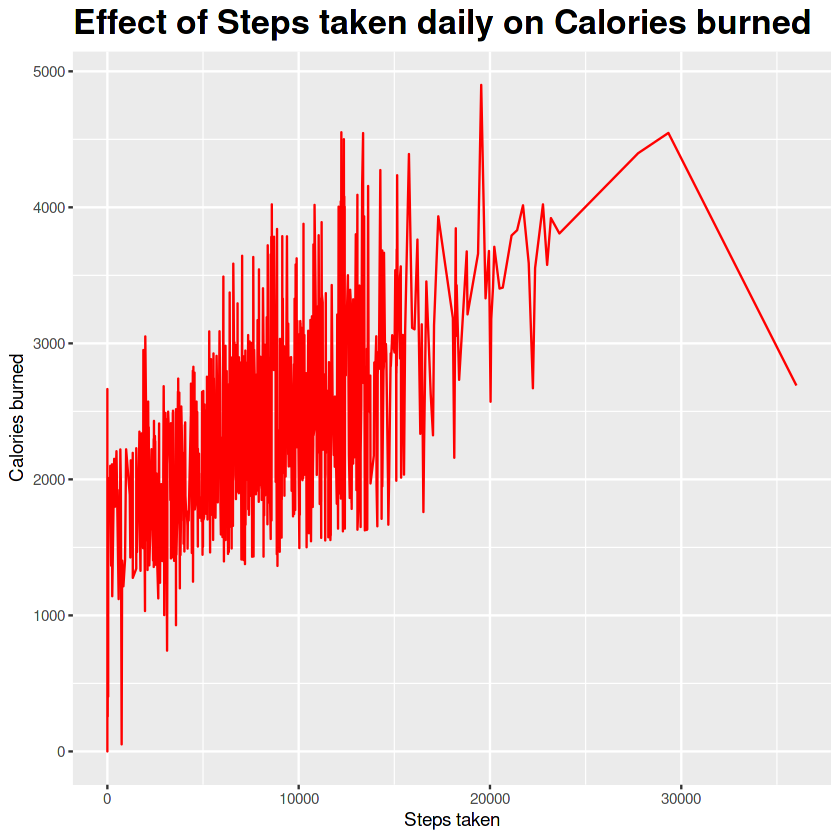

In [127]:
ggplot(data = merged_data) + 
geom_line(mapping = aes(x = TotalSteps, y = Calories,), color = "Red") + 
labs(title = "Effect of Steps taken daily on Calories burned", x = "Steps taken", y = "Calories burned") +
theme(plot.title = element_text(size = 20, face = "bold"))

This shows that the calories burned do depends on the steps taken by a user in a particular day. This suggests that people should be encouraged to take more steps and show them the benefit of it in real-time as an additional feature, this would motivate them to push further by looking the results instantly on their phone app. 

**3. Lets Visualize the frequency of users who sleep less than 6 hours/day.**

In [155]:
# We can use the tibble generated from previous steps and change the format of field 'Id' to character
a$Id <- as.character(a$Id)

# Lets confirm the change we made
str(a)

grouped_df [100 × 5] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ Id                : chr [1:100] "1503960366" "1503960366" "1503960366" "1503960366" ...
 $ SleepDay          : POSIXct[1:100], format: "2016-04-12" "2016-04-16" ...
 $ TotalSleepRecords : int [1:100] 1 2 1 1 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int [1:100] 327 340 304 325 277 245 341 277 273 247 ...
 $ TotalTimeInBed    : int [1:100] 346 367 320 364 323 274 354 309 296 264 ...
 - attr(*, "groups")= tibble [22 × 2] (S3: tbl_df/tbl/data.frame)
  ..$ Id   : chr [1:22] "1503960366" "1644430081" "1927972279" "2026352035" ...
  ..$ .rows: list<int> [1:22] 
  .. ..$ : int [1:14] 1 2 3 4 5 6 7 8 9 10 ...
  .. ..$ : int [1:3] 15 16 17
  .. ..$ : int [1:2] 18 19
  .. ..$ : int 20
  .. ..$ : int 21
  .. ..$ : int [1:24] 22 23 24 25 26 27 28 29 30 31 ...
  .. ..$ : int [1:3] 46 47 48
  .. ..$ : int [1:3] 49 50 51
  .. ..$ : int [1:6] 52 53 54 55 56 57
  .. ..$ : int [1:8] 58 59 60 61 62 63 64 65
  .. ..$ : int [1:5] 66 67 68 69 70
  

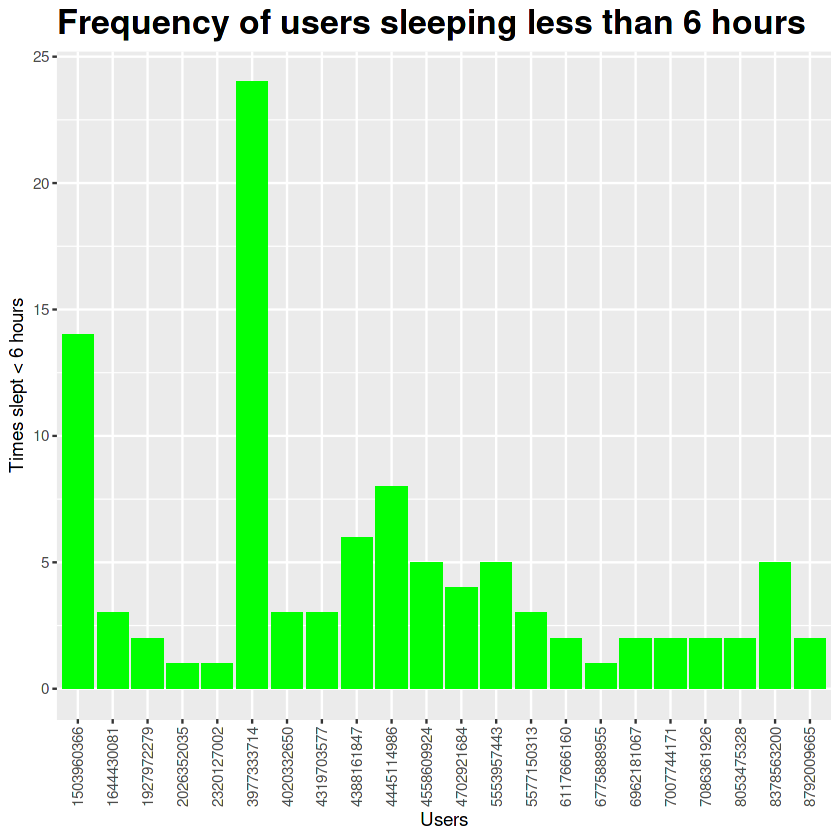

In [154]:
ggplot(data = a) + 
geom_bar(mapping = aes(x = Id), fill = "Green") + 
labs(title = "Frequency of users sleeping less than 6 hours", x = "Users", y = "Times slept < 6 hours") +
theme(plot.title = element_text(size = 20, face = "bold"), axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=12))

We can now identify these users who sleep less than 6 hours/day and notify them to help them to make better informed decisions. 

# **6. Act**

**Use the data findings to answer the business tasks and provide high-level recommendations:**

* **What are some trends in smart device usage.** 

  1. Users take less steps daily when compared to the minimum amount defined by CDC. 
  2. Many users sleep less than the minimum thresold of 6 hours/day.
  3. Many NA values noticed in the `weight_log` dataset.
  4. Calories burned by a user almost vary linearly with the number of steps taken daily.
  5. Some people wake frequently during night.
  6. Heart rate was not stored for every user.
 
 
 *Note - The above trends and findings do not posses great validity as the sample size was not ample enough to   back any of these results*
 
 
* **How can these trends apply to Bellabeat's customers.**

  1. Bellabeat also develops smart products like 'leaf' and 'Time' which are trackers that track fitness       activities of the users and help them to make informed decisions.
  2. Bellabeat could add features like notifying users when they sleep less than the recommended amount or motivate them by sending pop-ups to take more steps. 
  3. Additional features like showing them effects of steps taken on calories burned may motivate them to push further. 
  4. Bellabeat could also show the results of sleep activity to users to inform them about their well-being and take additional steps like meditate, this might be an *opportunity to introduce an meditate feature in the activity app on the smart devices.* 
  
  
  *Note -These all are suggestions made on the data recorded of 33 users and might not reflect the actual audience size of consumers.*

* **How could these trends help influence Bellabeat's marketing strategy.**

  1. Bellabeat can use the relationship between steps taken and calories burned to demonstarte the effect of healthy lifestyle and inspire users to be active and record their progress.
  2. Bellabeat can showcase that its products include features like sleep cycle tracking and heart rate. This might persuade consumers to transform their life and keep track of these key characteristics in an *uncomplicated* way.